In [1]:
import numpy as np
import sympy as smp
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter

In [2]:
# Derivation of equations for Newtonian gravity
t, m1, m2, G, c = smp.symbols('t m_1 m_2 G c')
the, r = smp.symbols('theta r', cls = smp.Function)
the = the(t)
r = r(t)
the_d = smp.diff(the, t)
r_d = smp.diff(r, t)
the_dd = smp.diff(the_d, t)
r_dd = smp.diff(r_d, t)

In [3]:
Tn = (0.5) * m2 * ((r**2 * the_d**2) + r_d**2)
Vn = (-G * m1 * m2) / r
Ln = Tn - Vn

In [4]:
LEnr = (smp.diff(Ln, r) - smp.diff(smp.diff(Ln, r_d), t).doit()).simplify()
LEnt = (smp.diff(Ln, the) - smp.diff(smp.diff(Ln, the_d), t).doit()).simplify()

In [5]:
eq_motion_nr = smp.solve(LEnr, r_dd)[0]
display(eq_motion_nr)
eq_motion_nt = smp.solve(LEnt, the_dd)[0]
eq_motion_nt

-G*m_1/r(t)**2 + r(t)*Derivative(theta(t), t)**2

-2.0*Derivative(r(t), t)*Derivative(theta(t), t)/r(t)

In [6]:
eqmotionnr_f = smp.lambdify([r, the_d, G, m1], eq_motion_nr)
eqmotionnt_f = smp.lambdify([r, r_d, the_d], eq_motion_nt)

In [7]:
def dSndt(t, Sn, G, m1):
    r_n, rd_n, the_n, thed_n = Sn
    return [rd_n, eqmotionnr_f(r_n, thed_n, G, m1), thed_n, eqmotionnt_f(r_n, rd_n, thed_n)]

In [94]:
G = 4 * np.pi**2
c = 63197.8
m1 = 1
m2 = 1.65e-7
a = 0.387
r0 = 0.307
rd0 = 0.0
theta0 = 0.0
v0 = np.sqrt(G * m1 * (2 / r0 - 1 / a))
thetad0 = v0 / r0
t_span = (0, 7)
t_eval = np.linspace(0, 7, 3500)

In [95]:
nsols = solve_ivp(dSndt, t_span = t_span, y0 = [r0, rd0, theta0, thetad0], t_eval = t_eval, args = [G, m1], rtol = 1e-12, atol = 1e-15)

In [96]:
rn = nsols.y[0]
rdn = nsols.y[1]
thetan = nsols.y[2]
thetadn = nsols.y[3]
xn = rn * np.cos(thetan)
yn = rn * np.sin(thetan)

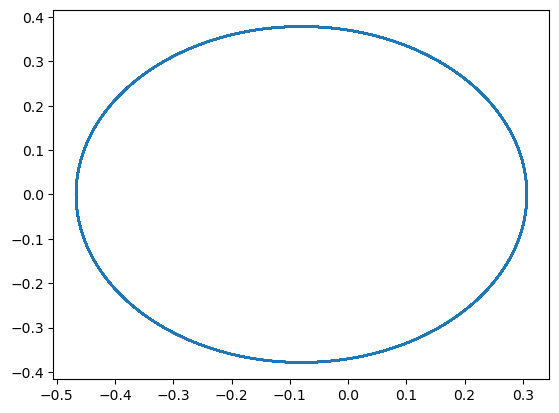

In [97]:
plt.plot(xn, yn)
plt.show()

In [98]:
# Derivation of equations for General Relativity
t, m1, m2, G, c = smp.symbols('t m_1 m_2 G c')
the, r = smp.symbols('theta r', cls = smp.Function)
the = the(t)
r = r(t)
the_d = smp.diff(the, t)
r_d = smp.diff(r, t)
the_dd = smp.diff(the_d, t)
r_dd = smp.diff(r_d, t)
scale_factor = 20000
gr_corr = scale_factor * (3 * G * m1 * the_d**2) / (c**2 * r)
eq_motion_grr = (eq_motion_nr + gr_corr)
display(eq_motion_grr)
eq_motion_nt

-G*m_1/r(t)**2 + 60000*G*m_1*Derivative(theta(t), t)**2/(c**2*r(t)) + r(t)*Derivative(theta(t), t)**2

-2.0*Derivative(r(t), t)*Derivative(theta(t), t)/r(t)

In [99]:
eqmotiongrr_f = smp.lambdify([r, the_d, G, c, m1], eq_motion_grr)

In [100]:
def dSgrdt(t, Sgr, G, c, m1):
    r_gr, rd_gr, the_gr, thed_gr = Sgr
    return [rd_gr, eqmotiongrr_f(r_gr, thed_gr, G, c, m1), thed_gr, eqmotionnt_f(r_gr, rd_gr, thed_gr)]

In [101]:
G = 4 * np.pi**2
c = 63197.8
m1 = 1
m2 = 1.65e-7
a = 0.387
r0 = 0.307
rd0 = 0.0
theta0 = 0.0
v0 = np.sqrt(G * m1 * (2 / r0 - 1 / a))
thetad0 = v0 / r0
t_span = (0, 7)
t_eval = np.linspace(0, 7, 3500)

In [102]:
grsols = solve_ivp(dSgrdt, t_span = t_span, y0 = [r0, rd0, theta0, thetad0], t_eval = t_eval, args = (G, c, m1), rtol = 1e-12, atol = 1e-15)

In [103]:
rgr = grsols.y[0]
rdgr = grsols.y[1]
thetagr = grsols.y[2]
thetadgr = grsols.y[3]
xgr = rgr * np.cos(thetagr)
ygr = rgr * np.sin(thetagr)

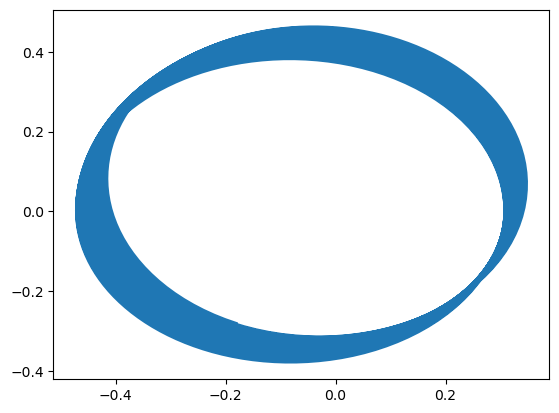

In [104]:
plt.plot(xgr, ygr)
plt.show()

In [112]:
step = 4
xnsample = xn[::step]
ynsample = yn[::step]
xgrsample = xgr[::step]
ygrsample = ygr[::step]

In [113]:
def animate(i):
    dot1.set_data([xnsample[i]], [ynsample[i]])
    trail1.set_data(xnsample[:i], ynsample[:i])
    dot2.set_data([xgrsample[i]], [ygrsample[i]])
    trail2.set_data(xgrsample[:i], ygrsample[:i])
    return dot1, trail1, dot2, trail2

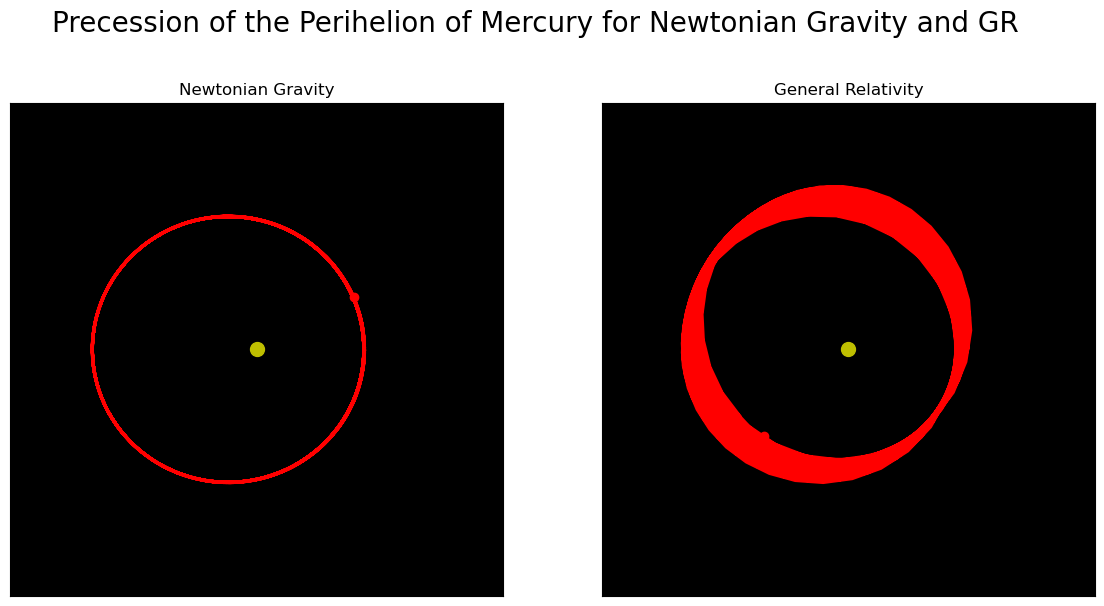

In [115]:
fig, axes = plt.subplots(1, 2, figsize = (14, 7))

for ax in axes:
    ax.set_xlim(-0.7, 0.7)
    ax.set_ylim(-0.7, 0.7)
    ax.set_aspect('equal', 'box')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.set_facecolor('k')
axes[0].set_title('Newtonian Gravity', fontsize = 12)
axes[1].set_title('General Relativity', fontsize = 12)

sun1, = axes[0].plot(0, 0, 'yo', markersize = 10)
sun2, = axes[1].plot(0, 0, 'yo', markersize = 10)

dot1, = axes[0].plot([], [], 'ro', markersize = 6)
trail1, = axes[0].plot([], [], 'r-', lw = 2)
dot2, = axes[1].plot([], [], 'ro', markersize = 6)
trail2, = axes[1].plot([], [], 'r-', lw = 2)

fig.suptitle('Precession of the Perihelion of Mercury for Newtonian Gravity and GR', fontsize = 20)

ani = animation.FuncAnimation(fig, animate, frames = len(xnsample), interval = 70, blit = True)
ani.save('mercury.gif', writer = 'pillow', fps = 25)